In [2]:
import sys
sys.executable


'/home/codespace/.python/current/bin/python'

In [3]:
! /home/codespace/.python/current/bin/python -m pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 23.5 MB/s  0:00:15m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 17.4 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 38.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 41.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 38.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 40.0 MB/s  0:00:00m0:00:0100:01
   ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  1/24 [libclang]  WARNING: The script wheel is installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 12/24 [markdown]  WARNING: The script markdown_py 

In [4]:
# =========================
# 0. Imports and Settings
# =========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression as SkLinearRegression
from sklearn.ensemble import ExtraTreesRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(42)
tf.random.set_seed(42)


2025-12-10 21:19:46.929553: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-10 21:19:47.971184: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-10 21:19:50.051776: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [5]:
cal = fetch_california_housing(as_frame=True)
df = cal.frame.copy()
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Exploratory Data Analysis (EDA)

In [6]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


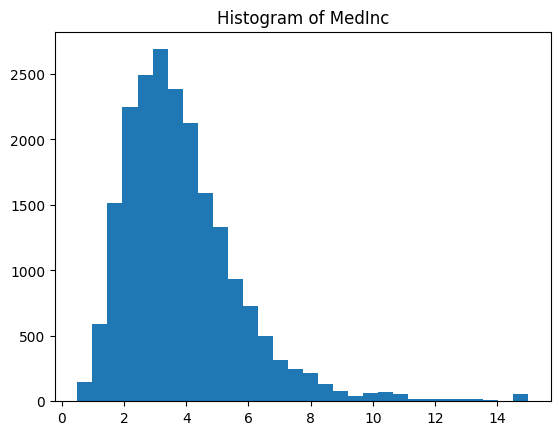

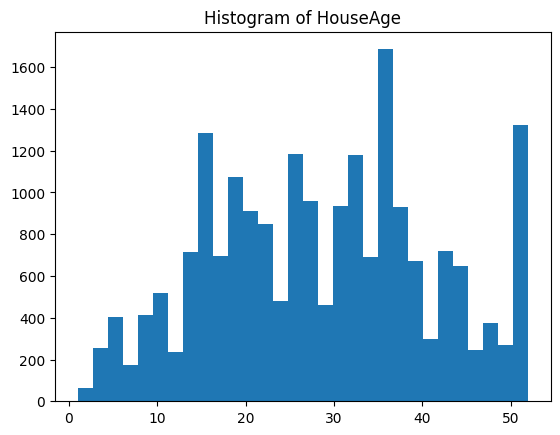

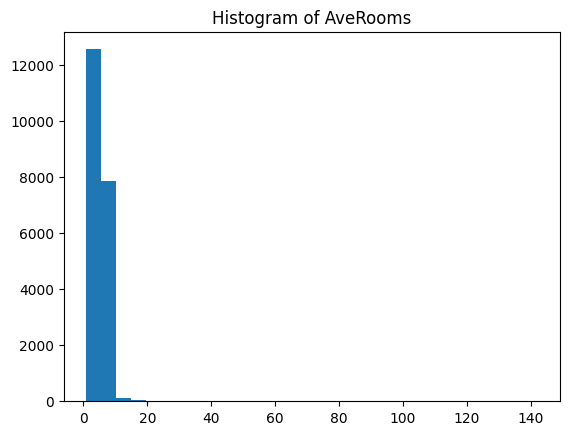

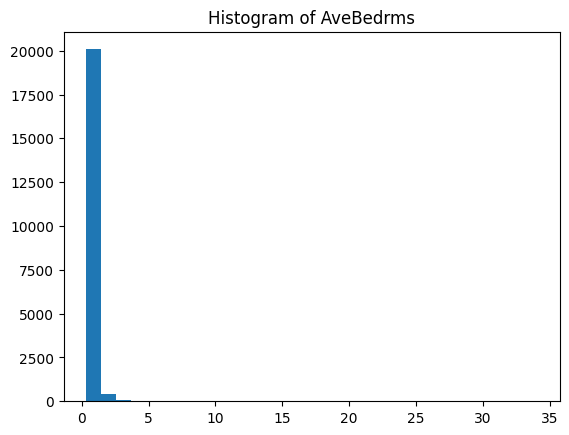

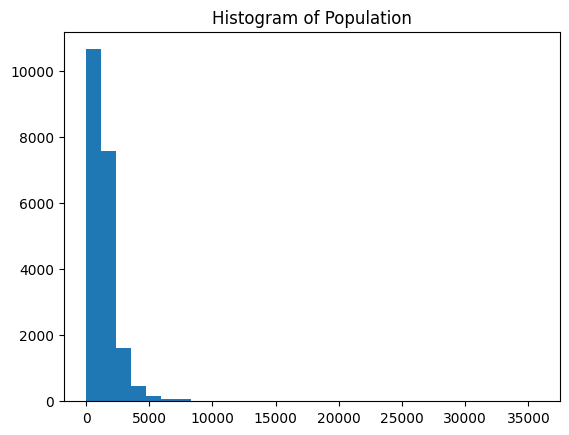

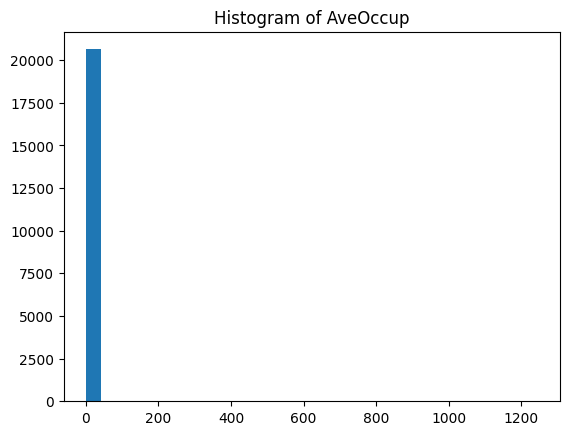

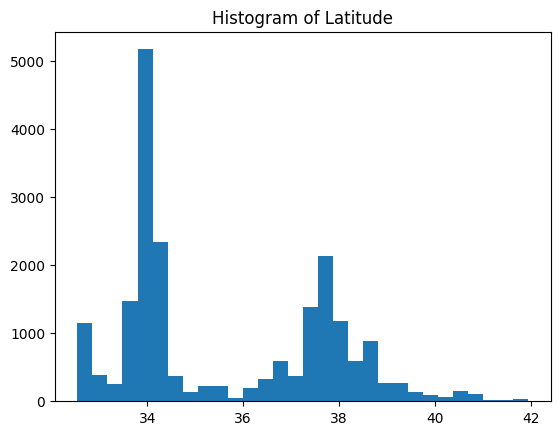

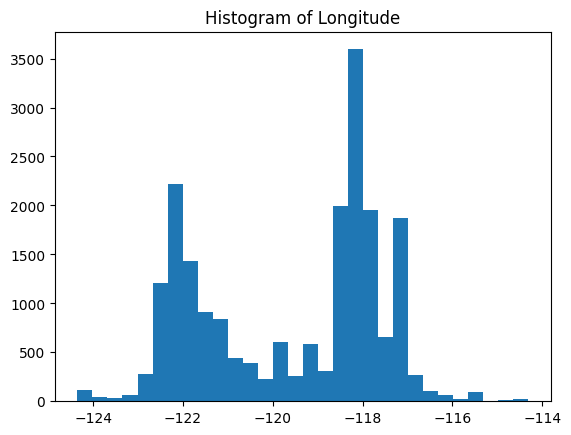

In [7]:
features = df.drop(columns=["MedHouseVal"]).columns

for col in features:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()


/tmp/ipykernel_89356/3554648826.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scaled, labels=features)


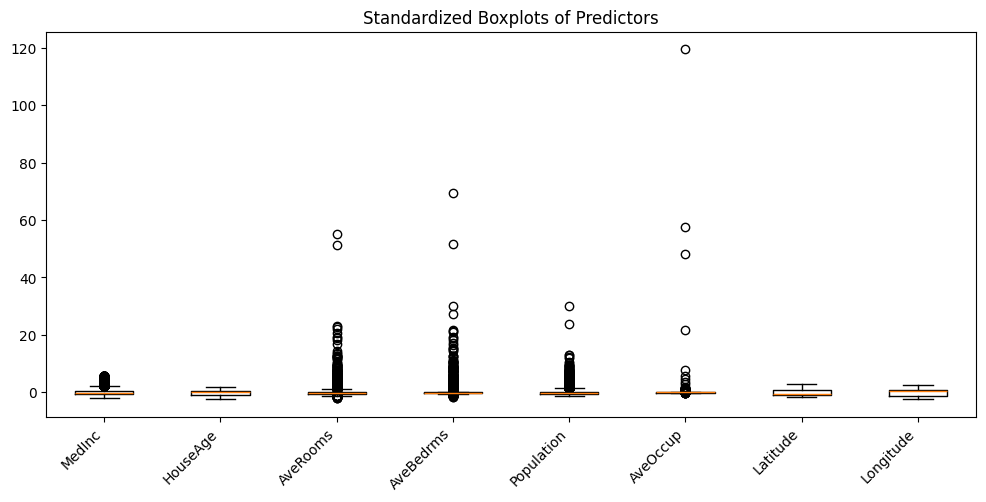

In [8]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[features])

plt.figure(figsize=(12,5))
plt.boxplot(scaled, labels=features)
plt.xticks(rotation=45, ha="right")
plt.title("Standardized Boxplots of Predictors")
plt.show()


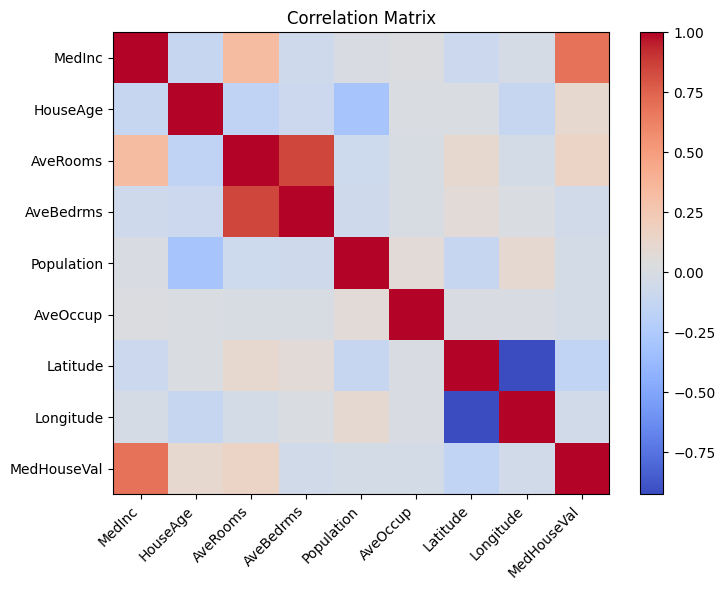

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [9]:
corr = df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="coolwarm", aspect="auto")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

corr


In [10]:
vif_results = []
X = df.drop(columns=["MedHouseVal"])

for col in X.columns:
    y_col = X[col]
    X_other = X.drop(columns=[col])

    lr = SkLinearRegression()
    lr.fit(X_other, y_col)
    r2 = lr.score(X_other, y_col)

    vif = np.inf if r2 >= 1 else 1 / (1 - r2)
    vif_results.append((col, vif))

pd.DataFrame(vif_results, columns=["Feature", "VIF"]).sort_values("VIF", ascending=False)


,Feature,VIF
6,Latitude,9.297624
7,Longitude,8.962263
2,AveRooms,8.342786
3,AveBedrms,6.994995
0,MedInc,2.501295
1,HouseAge,1.241254
4,Population,1.138125
5,AveOccup,1.008324


## Train/Test Split

In [11]:
X = df.drop(columns=["MedHouseVal"])
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((16512, 8), (4128, 8))

## Classical ML Models (SVR, KNN)

In [12]:
svr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

svr_grid = {
    "svr__C": [1, 10, 100],
    "svr__epsilon": [0.01, 0.1, 0.2],
    "svr__gamma": ["scale", "auto"]
}

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
neg_rmse = make_scorer(lambda yt, yp: -np.sqrt(mean_squared_error(yt, yp)))

svr_cv = GridSearchCV(
    svr_pipe, svr_grid, scoring=neg_rmse, cv=kfold, n_jobs=-1
)

svr_cv.fit(X_train, y_train)
svr_best = svr_cv.best_estimator_
svr_cv.best_params_


{'svr__C': 100, 'svr__epsilon': 0.1, 'svr__gamma': 'auto'}

In [13]:
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor())
])

knn_grid = {
    "knn__n_neighbors": [3, 5, 7, 9],
    "knn__weights": ["uniform", "distance"]
}

knn_cv = GridSearchCV(
    knn_pipe, knn_grid, scoring=neg_rmse, cv=kfold, n_jobs=-1
)

knn_cv.fit(X_train, y_train)
knn_best = knn_cv.best_estimator_
knn_cv.best_params_


{'knn__n_neighbors': 9, 'knn__weights': 'distance'}

## Deep Learning Models

In [14]:
def build_baseline_mlp(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model


In [15]:
def build_improved_mlp(input_dim):
    model = Sequential([
        Input(shape=(input_dim,)),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation="relu"),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="mse", metrics=["mae"])
    return model


In [16]:
scaler_dl = StandardScaler()
X_train_scaled = scaler_dl.fit_transform(X_train)
X_test_scaled = scaler_dl.transform(X_test)

input_dim = X_train_scaled.shape[1]

# Baseline MLP
baseline_mlp = build_baseline_mlp(input_dim)
early_stop = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

history_base = baseline_mlp.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=64,
    callbacks=[early_stop],
    verbose=0
)

# Improved MLP
improved_mlp = build_improved_mlp(input_dim)
early_stop2 = EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)

history_imp = improved_mlp.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=300,
    batch_size=64,
    callbacks=[early_stop2],
    verbose=0
)


2025-12-10 21:45:32.920121: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Training Curve Visualization

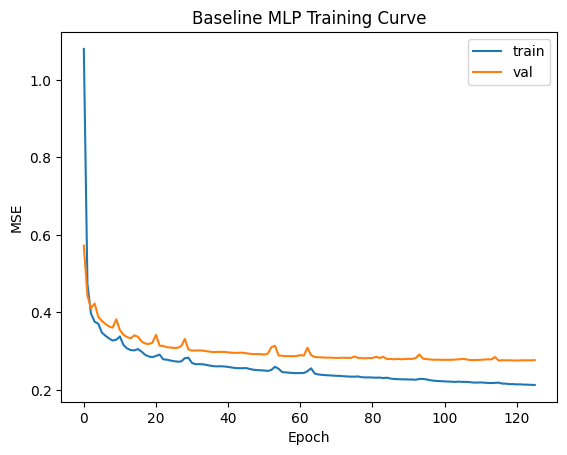

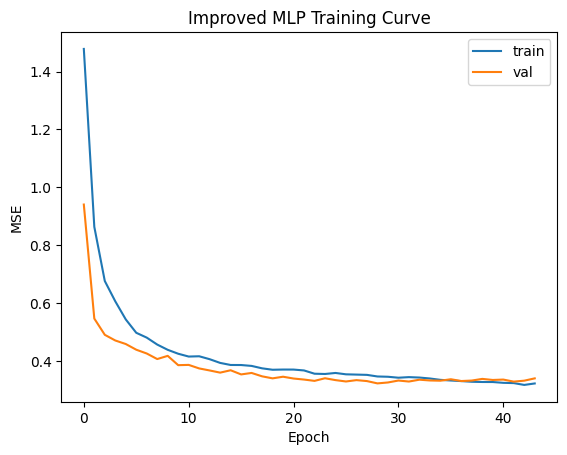

In [17]:
# Baseline MLP
plt.figure()
plt.plot(history_base.history["loss"], label="train")
plt.plot(history_base.history["val_loss"], label="val")
plt.title("Baseline MLP Training Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Improved MLP
plt.figure()
plt.plot(history_imp.history["loss"], label="train")
plt.plot(history_imp.history["val_loss"], label="val")
plt.title("Improved MLP Training Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()


## Model Evaluation

In [18]:
def adjusted_r2(r2, n, p):
    return 1 - (1-r2)*(n-1)/(n-p-1)

def evaluate(name, y_true, y_pred, p):
    return {
        "Model": name,
        "R2": r2_score(y_true, y_pred),
        "Adj_R2": adjusted_r2(r2_score(y_true, y_pred), len(y_true), p),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "MAE": mean_absolute_error(y_true, y_pred)
    }


In [19]:
results = []

# SVR
y_svr = svr_best.predict(X_test)
results.append(evaluate("SVR", y_test, y_svr, X_train.shape[1]))

# KNN
y_knn = knn_best.predict(X_test)
results.append(evaluate("KNN", y_test, y_knn, X_train.shape[1]))

# Baseline MLP
y_base = baseline_mlp.predict(X_test_scaled).flatten()
results.append(evaluate("Baseline MLP", y_test, y_base, X_train.shape[1]))

# Improved MLP
y_imp = improved_mlp.predict(X_test_scaled).flatten()
results.append(evaluate("Improved MLP", y_test, y_imp, X_train.shape[1]))

pd.DataFrame(results)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step


,Model,R2,Adj_R2,RMSE,MAE
0,SVR,0.755722,0.755248,0.565777,0.371703
1,KNN,0.680144,0.679522,0.647412,0.437465
2,Baseline MLP,0.785742,0.785326,0.529873,0.361788
3,Improved MLP,0.762063,0.761601,0.558386,0.387557


## Residual Analysis (Improved MLP)

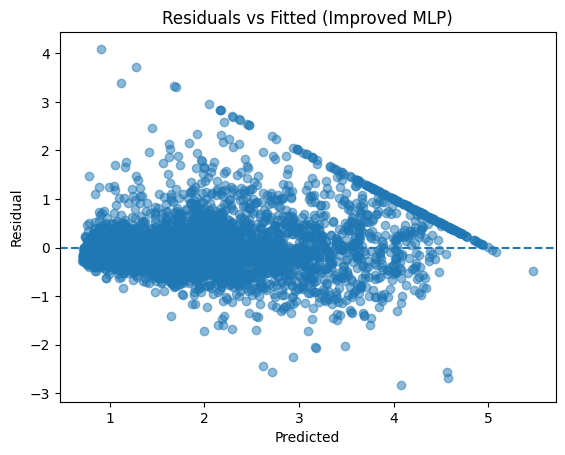

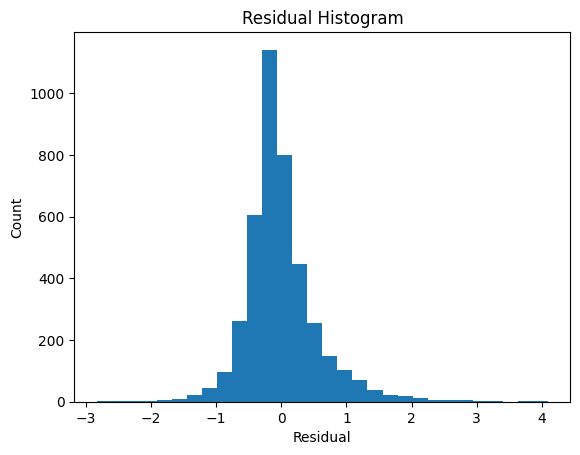

In [20]:
resid = y_test - y_imp

plt.figure()
plt.scatter(y_imp, resid, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.title("Residuals vs Fitted (Improved MLP)")
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.show()

plt.figure()
plt.hist(resid, bins=30)
plt.title("Residual Histogram")
plt.xlabel("Residual")
plt.ylabel("Count")
plt.show()


## Feature Importance (ExtraTrees)

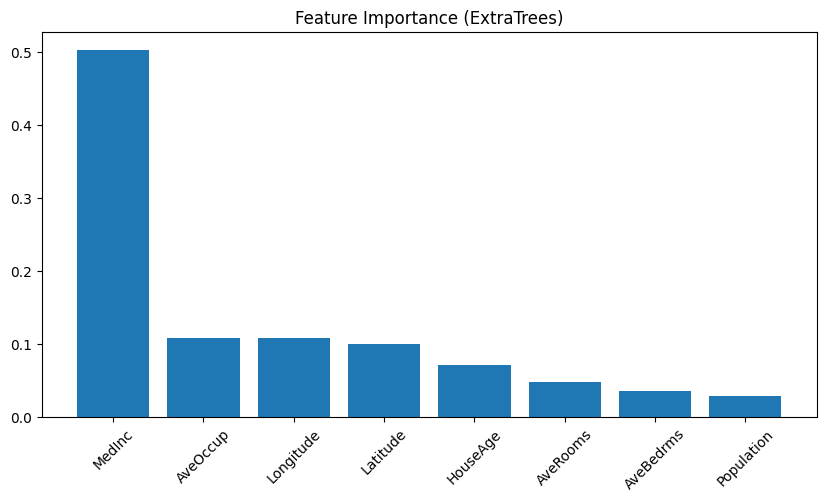

,feature,importance
0,MedInc,0.502877
5,AveOccup,0.107864
7,Longitude,0.107787
6,Latitude,0.100091
1,HouseAge,0.071276
2,AveRooms,0.047485
3,AveBedrms,0.034788
4,Population,0.027832


In [21]:
etr = ExtraTreesRegressor(random_state=42)
etr.fit(X_train, y_train)

importances = pd.DataFrame({
    "feature": X_train.columns,
    "importance": etr.feature_importances_
}).sort_values("importance", ascending=False)

plt.figure(figsize=(10,5))
plt.bar(importances["feature"], importances["importance"])
plt.xticks(rotation=45)
plt.title("Feature Importance (ExtraTrees)")
plt.show()

importances
